# 2 qubit entanglement

## Initialise a 2 qubit quantum circuit

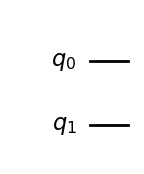

In [1]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2)

qc.draw("mpl")

## Put the first qubit into superposition using a Hadamard gate

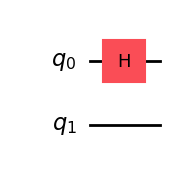

In [2]:
qc.h(0)

qc.draw("mpl")

## Apply the CNOT gate to entangle the qubits

In [3]:
qc.cx(0, 1)

qc.draw("mpl")

state = Statevector(qc)
print(state)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


## Measure the state

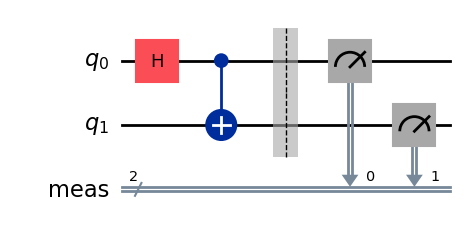

In [4]:
qc.measure_all()

qc.draw("mpl")


## Execute the circuit with the sampler

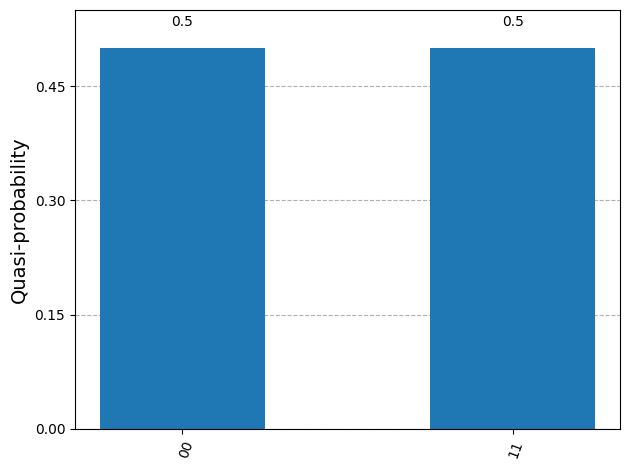

In [5]:
shots = 1000

result = StatevectorSampler().run([qc], shots=shots).result()

counts = result[0].data.meas.get_counts()

plot_histogram({p: c / shots for p, c in counts.items()})